In [2]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Part 1

In [4]:
all_images = np.load('YaleB_32x32.npy')
all_images

array([[ 82,  81,  72, ...,  35,  33,  22],
       [ 86,  86,  74, ...,  20,  14,   9],
       [ 76,  88,  80, ...,   9,   6,   6],
       ...,
       [  3,   3,   3, ..., 200, 202, 192],
       [  3,   3,   3, ..., 253, 255, 250],
       [  5,   3,   4, ..., 174, 175, 179]], dtype=uint8)

In [5]:
# Take the mean of each position pixel across all images

# Each row is a new image, each column is a pixel
array_avg = np.mean(all_images, axis = 0)
centered_images = all_images - array_avg

In [6]:
centered_images

array([[ 19.63628832,  18.53935377,  14.47183099, ..., -17.13877382,
        -17.26429163, -27.28293289],
       [ 23.63628832,  23.53935377,  16.47183099, ..., -32.13877382,
        -36.26429163, -40.28293289],
       [ 13.63628832,  25.53935377,  22.47183099, ..., -43.13877382,
        -44.26429163, -43.28293289],
       ...,
       [-59.36371168, -59.46064623, -54.52816901, ..., 147.86122618,
        151.73570837, 142.71706711],
       [-59.36371168, -59.46064623, -54.52816901, ..., 200.86122618,
        204.73570837, 200.71706711],
       [-57.36371168, -59.46064623, -53.52816901, ..., 121.86122618,
        124.73570837, 129.71706711]])

In [7]:
len(centered_images)

2414

In [8]:
len(centered_images[0])

1024

In [9]:
np.average(centered_images)

-8.315174931741023e-17

In [10]:
## Part 2

In [11]:
summed_output_matrix = np.dot(centered_images[0].reshape(-1, 1), centered_images[0].reshape(1, -1))
for i in range(len(centered_images)):
    if i == 0:
        continue
    curr_image = centered_images[i]
    outer_product = np.dot(curr_image.reshape(-1, 1), curr_image.reshape(1, -1))
    summed_output_matrix = summed_output_matrix + outer_product
summed_output_matrix = summed_output_matrix/(len(centered_images) - 1)

In [12]:
summed_output_matrix

array([[ 4489.89086662,  4389.34792897,  3995.10495964, ...,
        -1746.30867941, -1717.96935269, -1747.38102573],
       [ 4389.34792897,  4494.33226746,  4121.91863906, ...,
        -1806.20485557, -1776.84081736, -1794.5663578 ],
       [ 3995.10495964,  4121.91863906,  4165.45776399, ...,
        -1715.27680755, -1671.3253095 , -1691.55397407],
       ...,
       [-1746.30867941, -1806.20485557, -1715.27680755, ...,
         3756.33920877,  3586.66741082,  3219.28148259],
       [-1717.96935269, -1776.84081736, -1671.3253095 , ...,
         3586.66741082,  3596.68436881,  3292.45606665],
       [-1747.38102573, -1794.5663578 , -1691.55397407, ...,
         3219.28148259,  3292.45606665,  3497.1660824 ]])

In [13]:
## Part 3

In [39]:
len(summed_output_matrix)

1024

In [40]:
m = 5

In [52]:
eig_vals, eig_vectors = eigh(summed_output_matrix, subset_by_index=[len(summed_output_matrix)-m, len(summed_output_matrix)-1] )

In [53]:
eig_vals

array([  58387.52148629,  107646.056463  ,  185353.02904613,
       1341168.50476773, 1369142.41612494])

In [54]:
eig_order = np.flip(np.argsort(eig_vals))

eig_val_diag_matrix = np.zeros((len(eig_vals), len(eig_vals)))
for i in range(len(eig_vals)):
    eig_val_diag_matrix[i, i] = eig_vals[eig_order[i]]
eig_val_diag_matrix

array([[1369142.41612494,       0.        ,       0.        ,
              0.        ,       0.        ],
       [      0.        , 1341168.50476773,       0.        ,
              0.        ,       0.        ],
       [      0.        ,       0.        ,  185353.02904613,
              0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ,
         107646.056463  ,       0.        ],
       [      0.        ,       0.        ,       0.        ,
              0.        ,   58387.52148629]])

In [55]:
eig_vectors

array([[-0.03957595, -0.07531788, -0.0129248 , -0.0432441 , -0.01304065],
       [-0.04086892, -0.07464607, -0.00978305, -0.04342345, -0.01177219],
       [-0.04420113, -0.07466892, -0.00669355, -0.04095089, -0.00905278],
       ...,
       [ 0.06005543, -0.05122133, -0.0465019 ,  0.03622013,  0.00148631],
       [ 0.05926712, -0.04764221, -0.04469105,  0.0348093 ,  0.00205216],
       [ 0.05968122, -0.04294845, -0.04219806,  0.03330786,  0.00305951]])

In [56]:
import copy
temp_eig_vectors = copy.deepcopy(eig_vectors)
for i in range(len(eig_vals)):
    eig_vectors[:, i] = temp_eig_vectors[:, eig_order[i]]
eig_vectors

array([[-0.01304065, -0.0432441 , -0.0129248 , -0.07531788, -0.03957595],
       [-0.01177219, -0.04342345, -0.00978305, -0.07464607, -0.04086892],
       [-0.00905278, -0.04095089, -0.00669355, -0.07466892, -0.04420113],
       ...,
       [ 0.00148631,  0.03622013, -0.0465019 , -0.05122133,  0.06005543],
       [ 0.00205216,  0.0348093 , -0.04469105, -0.04764221,  0.05926712],
       [ 0.00305951,  0.03330786, -0.04219806, -0.04294845,  0.05968122]])

In [20]:
## Part 4

In [21]:
all_eig_vals, _ = eigh(summed_output_matrix)

In [22]:
proportion = .07
lowerBound = proportion*sum(all_eig_vals)
upperBound = max(all_eig_vals)

In [23]:
eig_vals, eig_vectors = eigh(summed_output_matrix, subset_by_value = [lowerBound, upperBound])

In [24]:
eig_vals

array([1341168.50476773, 1369142.41612494])

In [25]:
all_eig_vals

array([1.31441582e+00, 1.36978864e+00, 1.40898068e+00, ...,
       1.85353029e+05, 1.34116850e+06, 1.36914242e+06])

In [26]:
lowerBound

266625.5947565419

In [27]:
## Part 5

In [28]:
# Project image works image by image
image = centered_images[0]
eig_vectors = eig_vectors

In [29]:
first_eig_vec = eig_vectors[:, 0]
np.shape(first_eig_vec)

(1024,)

In [30]:
np.shape(image)

(1024,)

In [31]:
weight = np.dot(first_eig_vec.reshape(1, -1), image.reshape(-1, 1))
weight

array([[304.80254429]])

In [32]:
image_pca = first_eig_vec*weight

In [33]:
image_pca

array([[-13.1809124 , -13.23557652, -12.48193428, ...,  11.03998893,
         10.6099647 ,  10.15232162]])

In [34]:
# overall For loop for part 5
image = image
eig_vectors = eig_vectors
num_projected_dimensions = np.shape(eig_vectors)[1]

summed_image_pca = np.zeros((np.shape(eig_vectors)[0], 1) )
for j in range(num_projected_dimensions):
    curr_eig_vector = eig_vectors[:, j]
    weight = np.dot(curr_eig_vector.reshape(1, -1), image.reshape(-1, 1))
    curr_image_pca = weight*(curr_eig_vector.reshape(-1, 1))
    summed_image_pca += curr_image_pca

summed_image_pca

array([[6.84122225],
       [4.83901287],
       [1.41736694],
       ...,
       [8.75796534],
       [7.45916035],
       [5.4548656 ]])

In [35]:
## Part 6

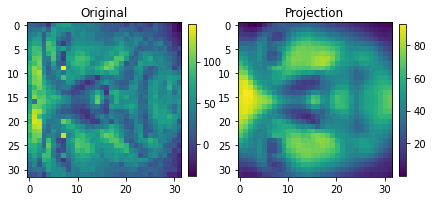

In [36]:
image = image.reshape(32, 32)
projected_image = summed_image_pca.reshape(32, 32)

# Plotting
fig, axs = plt.subplots(1, 2)
fig.tight_layout()

axs[0].set_title('Original')
show_image = axs[0].imshow(image, aspect='equal')
bar_image = plt.colorbar(show_image, ax=axs[0], fraction=0.045, pad=0.04)

axs[1].set_title('Projection')
show_proj_image = axs[1].imshow(projected_image, aspect='equal')
bar_proj_image = plt.colorbar(show_proj_image, ax=axs[1], fraction=0.045, pad=0.04)

In [37]:
x = 1

In [8]:
import numpy as np

In [9]:
X = np.matrix([ [1, 3], [1, -2], [1, -1], [1, 0] ])
Y = np.array([4, -1, 0, 2])

In [10]:
X

matrix([[ 1,  3],
        [ 1, -2],
        [ 1, -1],
        [ 1,  0]])

In [11]:
Z = np.dot(X.T, X)
I = np.linalg.inv(Z)
PI = np.dot(I, X.T)
hat_beta = np.dot(PI, Y)

In [12]:
hat_beta

matrix([[1.25, 1.  ]])

In [13]:
1.3 + (-0.1*3)

1.0

In [2]:
1.3 + (-0.1*-2)

1.5

In [3]:
1.3 + (-0.1*5)

0.8

In [4]:
1.3 + (-0.1*-3)

1.6

In [5]:
(1-3)**2 + (1.5-0)**2 + (.8-1)**2 + (1.6-2)**2

6.45

In [6]:
6.45/4

1.6125